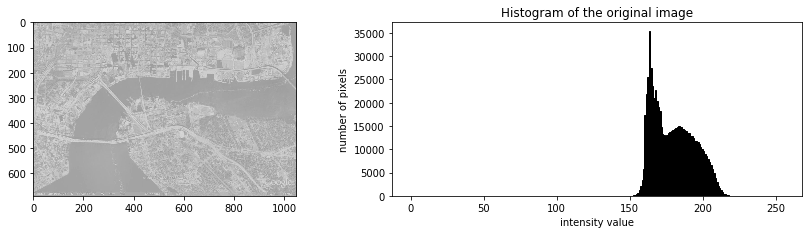

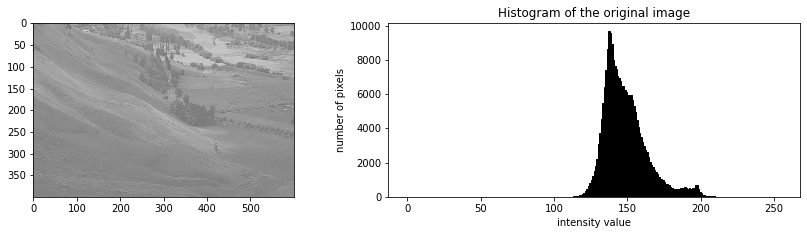

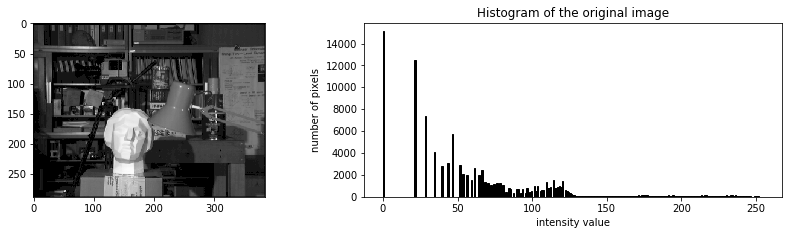

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os 


def plot_histogram(original_img):
    f, axes = plt.subplots(1, 2, figsize=(12, 3))
    axes[0].imshow(original_img, 'gray', vmin=0, vmax=255)
    axes[1].hist(original_img.ravel() , bins=range(0,256), fc='k', ec='k')
    plt.tight_layout() 
    plt.xlabel('intensity value') 
    plt.ylabel('number of pixels') 
    plt.title('Histogram of the original image') 
    plt.show()
    

     
path_1='C:/Users/jobe/Desktop/map.jpg'
img1=cv2.imread(path_1 , 0) 
map_hist=plot_histogram(img1)

path_2='C:/Users/jobe/Desktop/Unequalized_Hawkes_Bay.jpg'
img2=cv2.imread(path_2 , 0) 
Unequalized_Hawkes_Bay_hist=plot_histogram(img2)

path_3='C:/Users/jobe/Desktop/tsukuba_l.png'
img3=cv2.imread(path_3, cv2.IMREAD_GRAYSCALE)
tsukuba_l_hist=plot_histogram(img3)



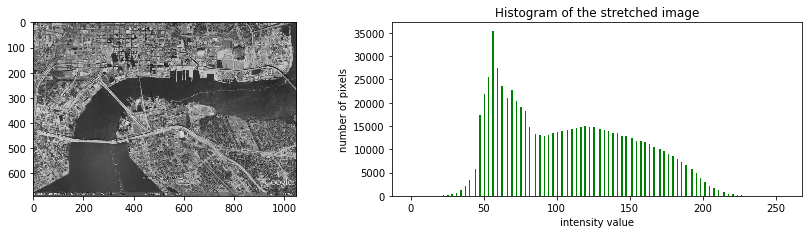

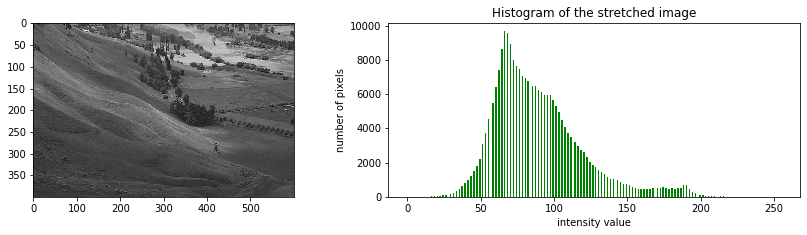

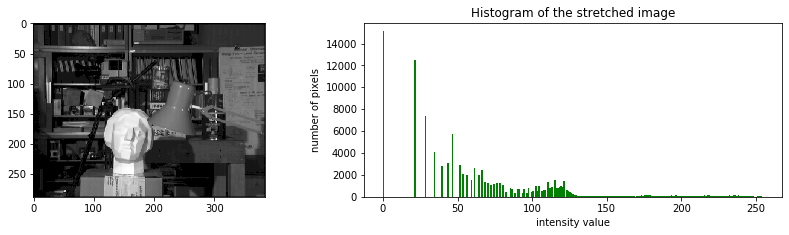

True

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

path_1='C:/Users/jobe/Desktop/map.jpg'
img11 = cv2.imread(path_1, 0) 

path_2='C:/Users/jobe/Desktop/Unequalized_Hawkes_Bay.jpg'
img22 = cv2.imread(path_2, 0) 

path_3='C:/Users/jobe/Desktop/tsukuba_l.png'
img33=cv2.imread(path_3, 0)

def plot_histogram_stretching(original_img):
    f, axes = plt.subplots(1, 2, figsize=(12, 3))
    axes[0].imshow(original_img, 'gray')
    axes[1].hist(original_img.ravel() ,bins=range(0,256), color='g')
    plt.tight_layout() 
    plt.xlabel('intensity value') 
    plt.ylabel('number of pixels') 
    plt.title('Histogram of the stretched image') 
    plt.show()

def stretching(original):
    constant = (255)/(original.max()-original.min()) 
    original_stretch = (original-original.min())* constant
    plot_histogram_stretching(original_stretch)

    

# stretching 
stretching(img11)
cv2.imwrite('Stretched_map.jpg', img11)

stretching(img22)
cv2.imwrite('Stretched_Hawkes_Bay.jpg', img22)

stretching(img33)
cv2.imwrite('Stretched_tsukuba_l.png', img33)

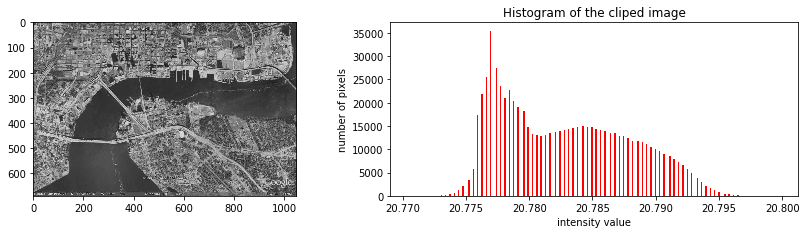

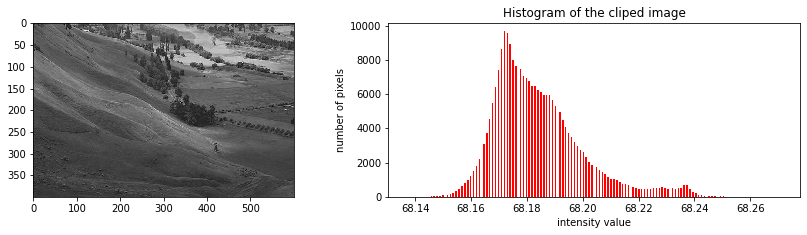

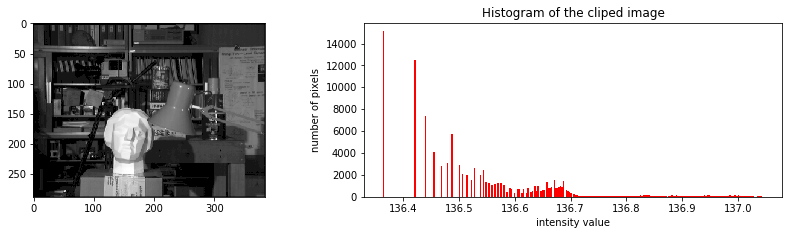

True

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import cv2


def plot_histogram_clipping(original_img):
    f, axes = plt.subplots(1, 2, figsize=(12, 3))
    axes[0].imshow(original_img, 'gray')
    axes[1].hist(original_img.ravel() ,256  , color='r')
    plt.tight_layout() 
    plt.xlabel('intensity value') 
    plt.ylabel('number of pixels') 
    plt.title('Histogram of the cliped image') 
    plt.show()
    
    
def clipping(original):
    (h, w)= original.shape
    hists, bins = np.histogram(original.ravel() ,256 ,[0,256]) 
    cum_hist=hists.cumsum()
    f1=[]
    for i in cum_hist:
        if i >= (0.01*(h*w)) and i <= (0.99*(h*w)):
            f1.append(i)
    low_treshold=min(f1)
    high_treshold=max(f1)
    constant = (255)/(high_treshold - low_treshold) 
    original_clipping = (original-low_treshold) * constant
    plot_histogram_clipping(original_clipping)
    

path_1='C:/Users/jobe/Desktop/map.jpg'
img_1 = cv2.imread(path_1, 0)  
clipping(img_1)
cv2.imwrite('clipping_map.jpg', img_1)

path_2='C:/Users/jobe/Desktop/Unequalized_Hawkes_Bay.jpg'
img_2 = cv2.imread(path_2, 0)
clipping(img_2)
cv2.imwrite('clipping_Hawkes_Bay.jpg', img_2)


path_3='C:/Users/jobe/Desktop/tsukuba_l.png'
img_3=cv2.imread(path_3, 0)
clipping(img_3)
cv2.imwrite('clipping_tsukuba_l.png', img_3)


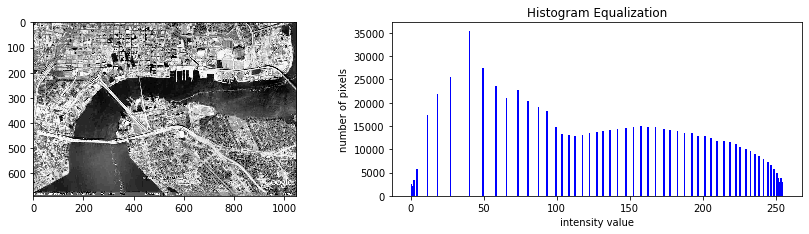

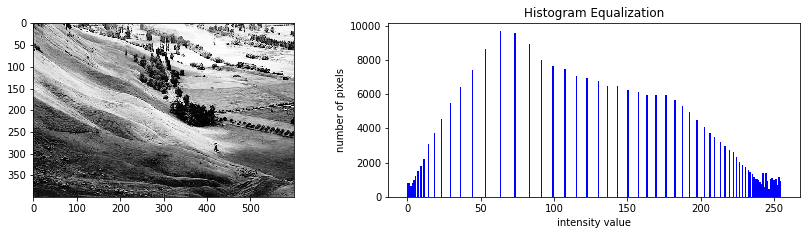

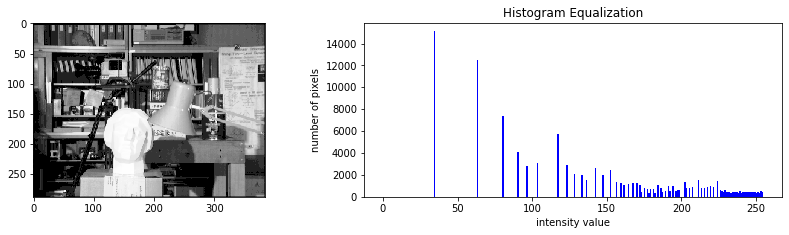

True

In [5]:

import matplotlib.pyplot as plt
import numpy as np
import cv2 


def equalize_hist(original_image):
    original_image_new= original_image
    h = len(original_image[:,0])
    w = len(original_image[0,:])
    
    hist,bins = np.histogram(original_image.flatten(),256,[0,256])
    cdf = hist.cumsum()
    cdf_normalized = cdf *(255/(h*w))
    
    for i in range (h):
        for j in range (w):
            original_image_new[i,j] = cdf_normalized[original_image[i,j]]
    return original_image_new

path_1='C:/Users/jobe/Desktop/map.jpg'
img111 = cv2.imread(path_1, 0)   
new_img111=equalize_hist(img111)

f, axes = plt.subplots(1, 2, figsize=(12, 3))
axes[0].imshow(new_img111, 'gray')
axes[1].hist(new_img111.ravel() ,bins=range(0,256), color='b')
plt.tight_layout() 
plt.xlabel('intensity value') 
plt.ylabel('number of pixels') 
plt.title('Histogram Equalization') 
plt.show()
cv2.imwrite('Equalization_map.jpg',new_img111)


path_2='C:/Users/jobe/Desktop/Unequalized_Hawkes_Bay.jpg'
img222 = cv2.imread(path_2, 0) 
new_img222=equalize_hist(img222)
f, axes = plt.subplots(1, 2, figsize=(12, 3))
axes[0].imshow(new_img222, 'gray')
axes[1].hist(new_img222.ravel() ,bins=range(0,256), color='b')
plt.tight_layout() 
plt.xlabel('intensity value') 
plt.ylabel('number of pixels') 
plt.title('Histogram Equalization') 
plt.show()
cv2.imwrite('Equalization_Hawkes_Bay.jpg',new_img222) 



path_3='C:/Users/jobe/Desktop/tsukuba_l.png'
img333=cv2.imread(path_3, 0)
new_img333=equalize_hist(img333)
f, axes = plt.subplots(1, 2, figsize=(12, 3))
axes[0].imshow(new_img333, 'gray')
axes[1].hist(new_img333.ravel() ,bins=range(0,256), color='b')
plt.tight_layout() 
plt.xlabel('intensity value') 
plt.ylabel('number of pixels') 
plt.title('Histogram Equalization') 
plt.show()
cv2.imwrite('Equalization_tsukuba_l.jpg',new_img333) 

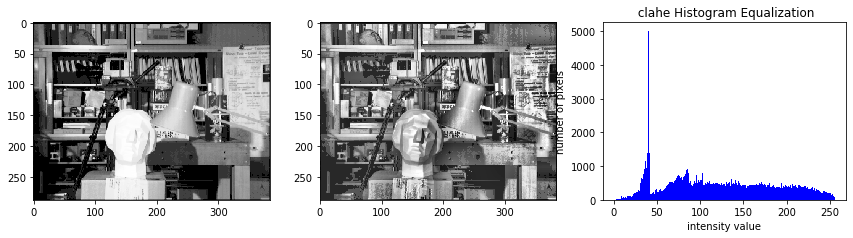

True

In [8]:
import cv2 
import numpy as np 
path_3='C:/Users/jobe/Desktop/tsukuba_l.png'
img333=cv2.imread(path_3, 0)

clahe = cv2.createCLAHE( tileGridSize=(8,8))
clahe_3333= clahe.apply(img333)

f, axes = plt.subplots(1, 3, figsize=(12, 3))
axes[0].imshow(new_img333, 'gray')
axes[1].imshow(clahe_3333, 'gray')
axes[2].hist(clahe_3333.ravel() ,256,[0,256], color='b')
plt.tight_layout() 
plt.xlabel('intensity value') 
plt.ylabel('number of pixels') 
plt.title(' clahe Histogram Equalization') 
plt.show()


cv2.imwrite('clahe_tsukuba_l.jpg',clahe_3333) 
